In [4]:
from modules import function
from modules import reactions

In [10]:
def polymer_volume(monomer_smiles,dp):
    
    smiles_list = [monomer_smiles]*dp
    polymer_smiles = reactions.Polymerization(smiles_list)[0]
    polymer_sp=function.Krevelen_sp(polymer_smiles)
    return polymer_sp.vol


ポリマー1ユニット当たりの分子体積<モノマーの分子体積

30量体までの分子を生成し、分子力場計算(ETKDG法)により分子のコンホメーションを最適化計算し、
その構造からモル体積を計算した。この手法により計算されたPMMAは重合度に対して線形に分子体積が大きくなったが、
単純なモノマーの分子体積の和ではなく、それよりも小さな値をとった。重合による分子の拘束が、分子体積の低下に影響しているとみられる。モノマーの分子体積和とポリマーの分子体積の差を、重合度nで標準化した値を、付加反応単位での体積減少への寄与$(C_{p})$とすると、


$C_{p}=(1/n)\cdot(\sum_{i=1}^n{V_{M(i)}} - V_{P(n)})$

Cpが意味するのは、モル単位での反応における、モル体積収縮への寄与である。重合前後の体積収縮率が既知のモノマー10種類について、重合度ごとの高分子のSMILESを生成し、それらに対して分子力場計算によるモル体積を見積もった。この結果で得られた計算上の高分子モル体積Vpに対し、重合に使用されたモノマーモル体積Vm(ETKDGによる推算値)の和との差を重合度で標準化したCpは、nが大きくなるにつれて一定の値に収束する傾向が見られた。

モノマー種によって若干の違いはあれど、おおよそCpは10 ~ 14(cm3/mol)程度の寄与がある。すなわち1molのモノマーが全て反応した場合、10 ~ 14㎝3分の体積が減少する。

MMAの重合(n=1~31,step5)の条件で計算したCpは、1量体を除いておおむね重合度依存性が低く、一定であると考えられる。

In [63]:

def Calc_Cp(smiles,dp):
    import numpy as np
    #MMA
    
    n = np.array([i for i in range(1,dp)])
    Vp = np.array([polymer_volume(smiles,i) for i in range(1,dp)])
    Vm_sum =np.array([i*polymer_volume(smiles,1) for i in range(1,dp)])

    return [n,Vp,Vm_sum]

In [ ]:
pe = Calc_Cp("C=C",10)
pan = Calc_Cp("C=CC#N",10)
pvc = Calc_Cp("C=CCl",10)
pman = Calc_Cp("C=C(C)C#N",10)
pvac = Calc_Cp("C=CCOC(=O)C",10)
pvc2 = Calc_Cp("C=C(Cl)Cl",10)
pmma = Calc_Cp("C=C(C)C(=O)OC",10)
ps = Calc_Cp("C=Cc1ccccc1",10)
pema = Calc_Cp("C=C(C)C(=O)OCC",10)
pbma = Calc_Cp("C=C(C)C(=O)OCCCC",5)

In [ ]:
polymer_cp_ls = {"PE":pe,"PAN":pan,"PVC":pvc,"PMAN":pman,"PVAc":pvac,"PVC2":pvc2,"PMMA":pmma,"PS":ps,"PEMA":pema,"PBMA":pbma}
polymer_cp_ls

In [ ]:

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,3))

for key,value in polymer_cp_ls.items():
    n,v_p,v_m_sum = value
    Cp = (v_m_sum-v_p)/n
    plt.plot(n,Cp)
plt.xlim(0,15)    
plt.xlabel("Degree of Polymerization")
plt.ylabel("Cp(g/mol)")    
plt.legend(polymer_cp_ls.keys())

In [ ]:
exp_polym_shrink = {"PE":0.66,
                 "PAN":0.31,
                 "PVC":0.34,
                 "PMAN":0.27,
                 "PVAc":0.209,
                 "PVC2":0.287,
                 "PMMA":0.212,
                 "PS":0.145,
                 "PEMA":0.178,
                 "PBMA":0.143}


In [ ]:
#収縮率
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,3))

for key,value in polymer_cp_ls.items():
    n,v_p,v_m_sum = value
    Ds = v_p/v_m_sum
    plt.plot(n,Ds)
plt.xlim(0,15)    
plt.xlabel("Degree of Polymerization")
plt.ylabel("Shrinkage factor")    
plt.legend(polymer_cp_ls.keys())

In [85]:
import pandas as pd
df = pd.DataFrame(polymer_cp_ls)

In [86]:
name = list(polymer_cp_ls.keys())
dp =  list(polymer_cp_ls.values())
Vp = pd.DataFrame([polymer_cp_ls[elem][1] for elem in name],index=name,columns = dp[0][0])
Vm_sum = pd.DataFrame([polymer_cp_ls[elem][2] for elem in name],index=name,columns = dp[0][0])


In [88]:
Vp.to_csv("CSV/MM_shrinkage_vp.csv")
Vm_sum.to_csv("CSV/MM_shrinkage_vm_sum.csv")

In [133]:
x = list(exp_polym_shrink.values())
y =1- Vp.loc[:,9].to_numpy()/Vm_sum.loc[:,9].to_numpy()
y2 =1- Vp.loc[:,5].to_numpy()/Vm_sum.loc[:,5].to_numpy()

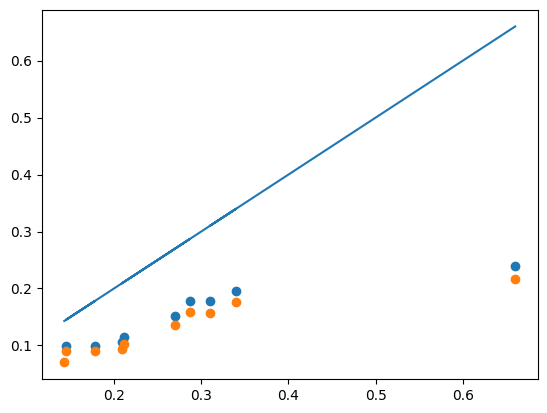

In [134]:
plt.scatter(x,y)
plt.scatter(x,y2)

plt.plot(x,x)